In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/d1_clean.csv')
#data = data.drop(columns=['time'])

X_raw = data.values
X_onebatch = X_raw[:,2:3]
print(X_onebatch.shape)

n = 1000

X = np.array([X_onebatch[i:i+n] for i in range(0, len(X_onebatch)-n+1, n) if i + n <= len(data)])
X = np.transpose(X, (0, 2, 1))

print(X.shape)

(347558, 1)
(347, 1, 1000)


In [2]:
import matplotlib.pyplot as plt

def plot_best_matches(top_k_search, best_matches):
    """Plot the top best matches of a query in a dataset."""
    fig, ax = plt.subplots(figsize=(20, 5), ncols=3)
    for i_k, (id_sample, id_timestamp) in enumerate(best_matches):
        # plot the sample of the best match
        ax[i_k].plot(top_k_search.X_[id_sample, 0], linewidth=2)
        # plot the location of the best match on it
        ax[i_k].plot(
            range(id_timestamp, id_timestamp + q.shape[1]),
            top_k_search.X_[id_sample, 0, id_timestamp : id_timestamp + q.shape[1]],
            linewidth=7,
            alpha=0.5,
            color="green",
            label="best match location",
        )
        # plot the query on the location of the best match
        ax[i_k].plot(
            range(id_timestamp, id_timestamp + q.shape[1]),
            q[0],
            linewidth=5,
            alpha=0.5,
            color="red",
            label="query",
        )
        ax[i_k].set_title(f"best match {i_k}")
        ax[i_k].legend()
    plt.show()


def plot_matrix_profile(X, mp, i_k):
    """Plot the matrix profile and corresponding time series."""
    fig, ax = plt.subplots(figsize=(20, 10), nrows=2)
    ax[0].set_title("series X used to build the matrix profile")
    ax[0].plot(X[0])  # plot first channel only
    # This is necessary as mp is a list of arrays due to unequal length support
    # as it can have different number of matches for each step when
    # using threshold-based search.
    ax[1].plot([mp[i][i_k] for i in range(len(mp))])
    ax[1].set_title(f"Top {i_k+1} matrix profile of X")
    ax[1].set_ylabel(f"Dist to top {i_k+1} match")
    ax[1].set_xlabel("Starting index of the query in X")
    plt.show()

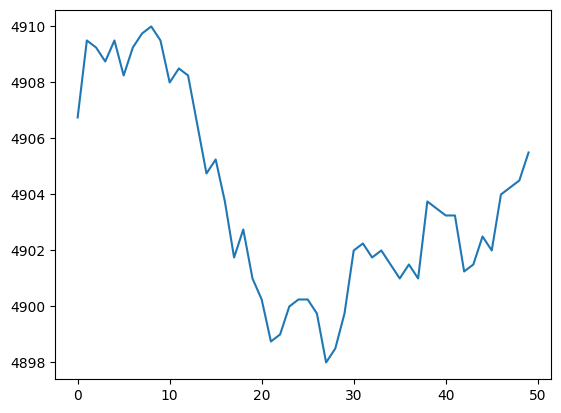

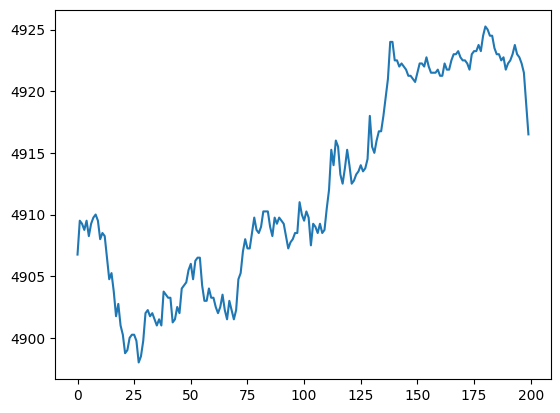

0
1
2
3
4
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [5]:
import numpy as np
# We will use the fourth sample an testing data
X_test = X[5]
mask = list(range(X.shape[0]))
mask = [num for num in mask if num not in [5]]
# Use this mask to exluce the sample from which we will extract the query
X_train = X[mask]

q = X_test[:, 200:250]
plt.plot(q[0])
plt.show()
plt.plot(X_test[:, 200:400][0])
plt.show()

for i in mask:
    print(i)

In [6]:
from aeon.similarity_search import QuerySearch

# Here, the distance function (distance and normalise arguments)
top_k_search = QuerySearch(k=3, distance="euclidean")
# Call fit to store X_train as the database to search in
top_k_search.fit(X_train)
distances_to_matches, best_matches = top_k_search.predict(q)
for i in range(len(best_matches)):
    print(f"match {i} : {best_matches[i]} with distance {distances_to_matches[i]} to q")

match 0 : [  3 898] with distance 19.225633929730378 to q
match 1 : [  3 897] with distance 19.261360284258224 to q
match 2 : [  3 899] with distance 19.5943231574862 to q


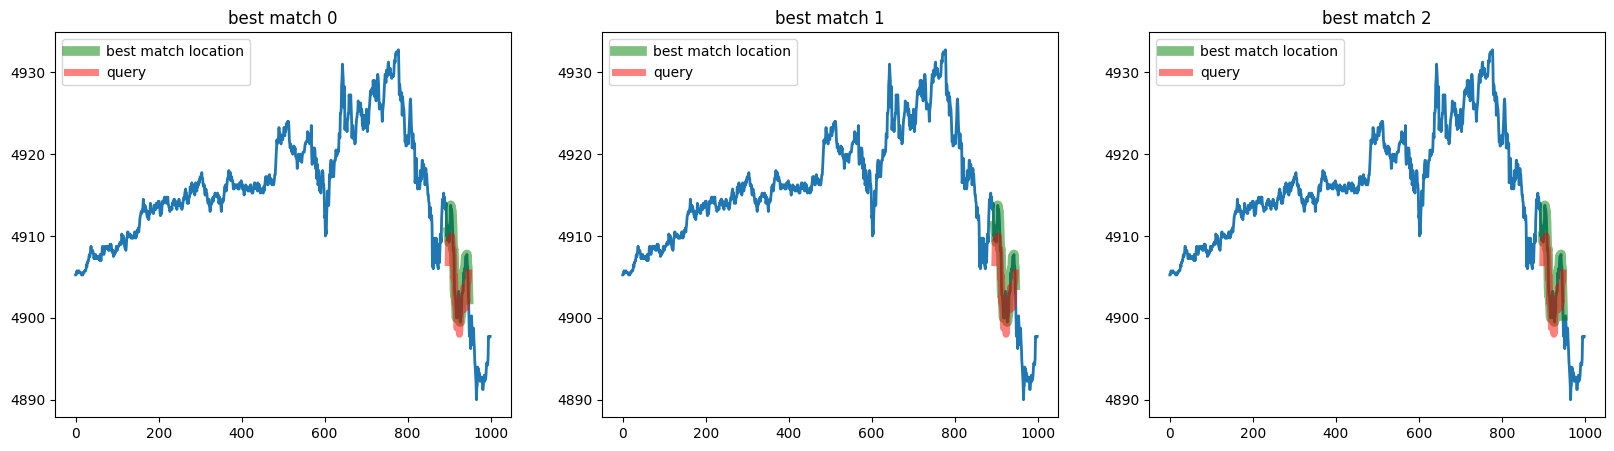

In [7]:
plot_best_matches(top_k_search, best_matches)